In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# df = pd.read_csv('../WindFlow/data/newdata.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/newdata.csv')
df = df[['fecha', 'WDIR', 'WSPD', 'TEMP']]
df.head()

,fecha,WDIR,WSPD,TEMP
0,2019-12-31 20:01:00,252.392,6.27000,19.7667
1,2019-12-31 20:02:00,268.839,7.45833,20.0417
2,2019-12-31 20:03:00,278.251,8.05333,20.3000
3,2019-12-31 20:04:00,267.579,8.10667,20.1417
4,2019-12-31 20:05:00,268.002,5.89833,20.1500


In [4]:
df_5 = df[4::5]
df_5.head()

,fecha,WDIR,WSPD,TEMP
4,2019-12-31 20:05:00,268.002,5.89833,20.1500
9,2019-12-31 20:10:00,270.175,6.95083,20.3083
14,2019-12-31 20:15:00,269.000,6.89500,20.5750
19,2019-12-31 20:20:00,270.507,7.27083,20.8333
24,2019-12-31 20:25:00,270.682,9.22501,20.3000


In [5]:
date_time = pd.to_datetime(df.pop('fecha'))

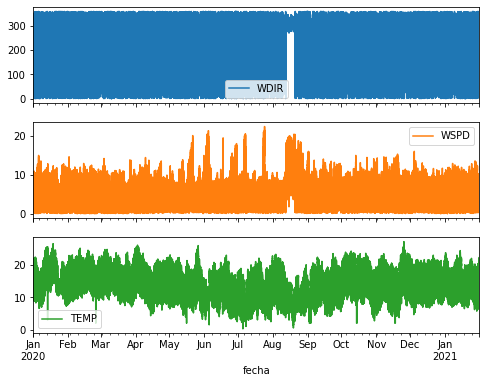

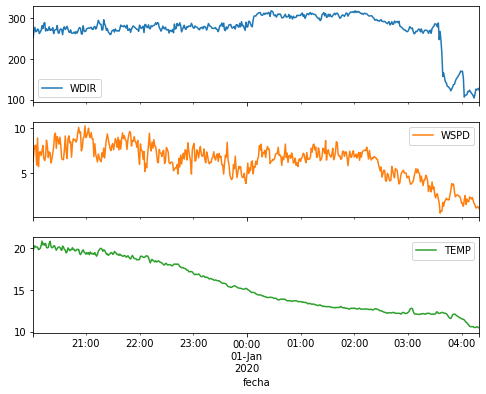

In [6]:
plot_cols = ['WDIR', 'WSPD', 'TEMP']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:500]
plot_features.index = date_time[:500]
_ = plot_features.plot(subplots=True)

In [7]:
df = df_5
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WDIR,114335.0,251.946651,70.155019,0.004753,255.47900,274.66700,286.96700,359.9970
WSPD,114335.0,4.958361,2.996900,0.062500,2.54417,4.72833,6.68667,21.8642
TEMP,114335.0,13.497780,4.800072,0.708333,9.64999,12.99170,17.62500,26.5333


Text(0, 0.5, 'Wind Velocity [m/s]')

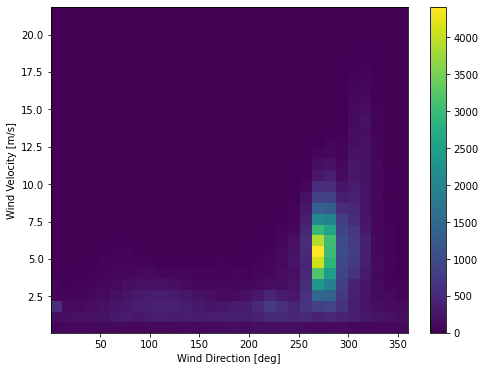

In [8]:
plt.hist2d(df['WDIR'], df['WSPD'], bins=(30, 30))
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [9]:
df = df.reset_index()
df.drop(columns=['index'], inplace = True)
df.head()

,fecha,WDIR,WSPD,TEMP
0,2019-12-31 20:05:00,268.002,5.89833,20.1500
1,2019-12-31 20:10:00,270.175,6.95083,20.3083
2,2019-12-31 20:15:00,269.000,6.89500,20.5750
3,2019-12-31 20:20:00,270.507,7.27083,20.8333
4,2019-12-31 20:25:00,270.682,9.22501,20.3000


In [10]:

# Calculate the wind x and y components.
df['wd_x'] = np.cos(df['WDIR']*np.pi/180)*df['WSPD']
df['wd_y'] = np.sin(df['WDIR']*np.pi/180)*df['WSPD']
df.pop('WDIR');
df.pop('WSPD');

0         5.89833
1         6.95083
2         6.89500
3         7.27083
4         9.22501
           ...   
114330    7.04083
114331    5.76750
114332    5.79583
114333    5.71917
114334    7.59417
Name: WSPD, Length: 114335, dtype: float64

In [12]:
df.head()


,fecha,TEMP,wd_x,wd_y
0,2019-12-31 20:05:00,20.1500,-0.205643,-5.894744
1,2019-12-31 20:10:00,20.3083,0.021230,-6.950798
2,2019-12-31 20:15:00,20.5750,-0.120334,-6.893950
3,2019-12-31 20:20:00,20.8333,0.064337,-7.270545
4,2019-12-31 20:25:00,20.3000,0.109804,-9.224356


(-8.548091539132677, 17.40451411150658, -16.366922534082907, 8.635040248743332)

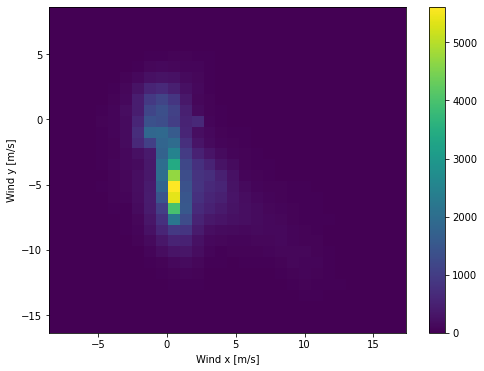

In [13]:
plt.hist2d(df['wd_x'], df['wd_y'], bins=(30, 30))
plt.colorbar()
plt.xlabel('Wind x [m/s]')
plt.ylabel('Wind y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [14]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s[0]

1577822460.0

In [15]:
day = 24*12*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

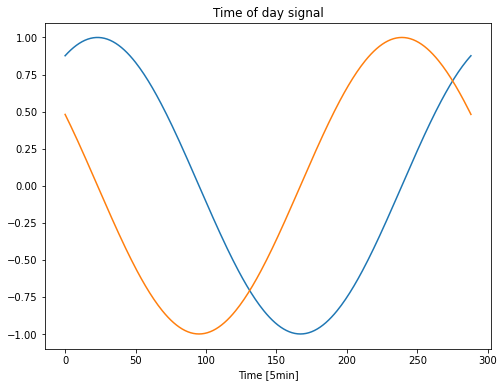

In [16]:
plt.plot(np.array(df['Day sin'])[:289])
plt.plot(np.array(df['Day cos'])[:289])
plt.xlabel('Time [5min]')
plt.title('Time of day signal')

In [17]:
df = df.drop(columns = ['fecha'])
df

,TEMP,wd_x,wd_y,Day sin,Day cos,Year sin,Year cos
0,20.1500,-0.205643,-5.894744,0.876727,0.480989,-0.025025,0.999687
1,20.3083,0.021230,-6.950798,0.887011,0.461749,-0.024965,0.999688
2,20.5750,-0.120334,-6.893950,0.896873,0.442289,-0.024906,0.999690
3,20.8333,0.064337,-7.270545,0.906308,0.422618,-0.024846,0.999691
4,20.3000,0.109804,-9.224356,0.915311,0.402747,-0.024786,0.999693
...,...,...,...,...,...,...,...
114330,21.4917,2.030200,-6.741778,0.806445,0.591310,0.497688,0.867356
114331,21.3583,-0.054558,-5.767242,0.819152,0.573576,0.497740,0.867326
114332,21.0667,-0.509473,-5.773394,0.831470,0.555570,0.497792,0.867297
114333,21.2417,0.924338,-5.643979,0.843391,0.537300,0.497843,0.867267


In [18]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
num_features

7

In [19]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TEMP,80034.0,13.252651,4.783787,0.708333,9.500000,1.274170e+01,17.216700,26.300000
wd_x,80034.0,1.152238,2.636426,-8.548092,-0.143148,5.609817e-01,1.622608,17.404514
wd_y,80034.0,-4.038916,3.325099,-16.366923,-6.363554,-4.432288e+00,-1.607434,8.635040
Day sin,80034.0,-0.000246,0.707125,-1.000000,-0.707107,-3.194505e-12,0.707107,1.000000
Day cos,80034.0,-0.000274,0.707098,-1.000000,-0.707107,-3.115112e-12,0.707107,1.000000
Year sin,80034.0,0.200094,0.679599,-1.000000,-0.406637,3.668785e-01,0.826696,1.000000
Year cos,80034.0,-0.203744,0.675728,-1.000000,-0.826703,-3.668785e-01,0.390057,1.000000


In [20]:
# normalization

# train_mean = train_df.mean()
# train_std = train_df.std()

# train_df = (train_df - train_mean) / train_std
# val_df = (val_df - train_mean) / train_std
# test_df = (test_df - train_mean) / train_std

## Window class defined

In [21]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [22]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [23]:
def plot(self, model=None, plot_col='TEMP', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [24]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [25]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

### def compile and fit

In [26]:
MAX_EPOCHS = 30

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [27]:
val_performance = {}
performance = {}

Total window size: 84
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Label indices: [72 73 74 75 76 77 78 79 80 81 82 83]
Label column name(s): ['wd_x', 'wd_y']

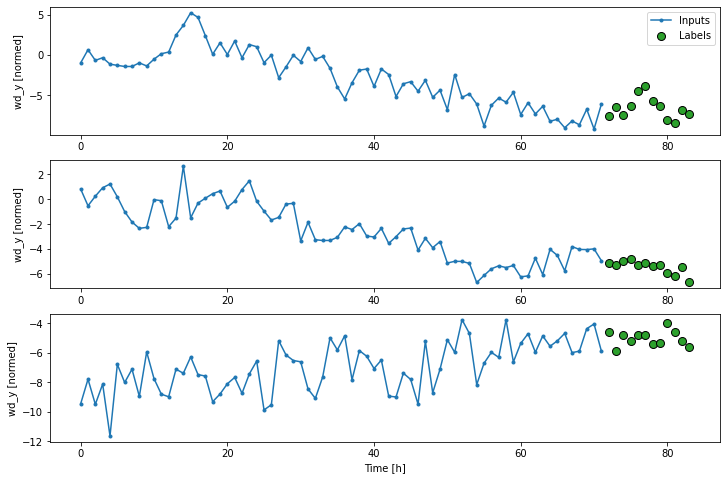

In [28]:
OUT_STEPS = 12
multi_window = WindowGenerator(input_width=72,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS, label_columns= ['wd_x', 'wd_y'])

multi_window.plot(plot_col='wd_y')
multi_window

In [29]:
from tensorflow.keras.layers import Normalization
# norm_layer = Normalization()
# norm_layer.adapt(train_df)
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    

    # norm_layer,
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
    #tf.keras.layers.LSTM(128, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*2,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, 2])
])

In [30]:
train_df.shape
# from tensorflow.keras.layers import Normalization

# def init_model():
#     input_shape = X_train_resampled.shape[1:]
#     normalizer = Normalization()
#     normalizer.adapt(X_train_resampled)
    
#     model = models.Sequential()
#     model.add(normalizer)
#     model.add(layers.Dense(32, activation='relu'))
#     model.add(layers.Dropout(0.3))
#     model.add(layers.Dense(16, activation='relu'))
#     model.add(layers.Dropout(0.3))
#     model.add(layers.Dense(8, activation='relu'))
#     model.add(layers.Dropout(0.3))
#     model.add(layers.Dense(1, activation = 'sigmoid'))

#     # Model compilation
#     optimizer = Adam(lr=0.0001)
#     model.compile(loss='binary_crossentropy',
#                   optimizer=optimizer,
#                   metrics=metrics)
#     return model

(80034, 7)

In [ ]:
history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/30
2499/2499 [==============================] - 97s 34ms/step - loss: 3.0816 - mean_absolute_error: 1.2181 - val_loss: 1.9931 - val_mean_absolute_error: 1.0049
Epoch 2/30
1817/2499 [====================>.........] - ETA: 19s - loss: 2.0529 - mean_absolute_error: 1.0155

In [ ]:
y_pred = multi_lstm_model.predict(multi_window.test)

In [ ]:
multi_window.plot(multi_lstm_model, plot_col = 'wd_y')

In [ ]:
print('Input shape:', multi_window.example[0].shape)
print('Output shape:', multi_lstm_model(multi_window.example[0]).shape)

In [ ]:
def convertToDegrees(Wd_x,Wd_y):
	'''
	Converting sine and cosine back to its circular angle depends on finding which of the the 4 circular quadrants the 
	prediction will fall into. If sin and cos are both GT 0, degrees will fall in 0-90.  If sin>0 cos<0, degrees will fall into 90-180, etc. 
	'''
	#quadrant1
	if Wd_x > 0 and Wd_y > 0:
		return  np.arctan(Wd_y/Wd_x)*180/np.pi
	#quadrant2
	if Wd_x < 0 and Wd_y > 0:
		return  np.arctan(Wd_y/Wd_x)*180/np.pi + 180
	#quadrant3
	if Wd_x < 0 and Wd_y < 0:
		return  np.arctan(Wd_y/Wd_x)*180/np.pi + 180
	#quadrant4
	if Wd_x > 0 and Wd_y < 0:
		return  np.arctan(Wd_y/Wd_x)*180/np.pi + 360

In [ ]:
def v_total(wd_x,wd_y):
  return np.sqrt(wd_x**2 + wd_y**2)

In [ ]:
def grade_dif(grade1,grade2):
  grade_max = max(grade1,grade2)
  grade_min = min(grade1,grade2)
  return min(grade_max - grade_min, grade_min +360 - grade_max)

In [ ]:
g1 = 40
g2 = 80
print(g1,g2,grade_dif(g1,g2))
g1 = 40
g2 = 140
print(g1,g2,grade_dif(g1,g2))
g1 = 40
g2 = 240
print(g1,g2,grade_dif(g1,g2))
g1 = 40
g2 = 340
print(g1,g2,grade_dif(g1,g2))

In [ ]:
g1 = 40
g2 = 80
print(g1,g2,v_total(g1,g2))
g1 = 40
g2 = 140
print(g1,g2,v_total(g1,g2))
g1 = 40
g2 = 240
print(g1,g2,v_total(g1,g2))
g1 = 40
g2 = 340
print(g1,g2,v_total(g1,g2))

In [ ]:
# grado = 290
# np.arcsin(np.sin(grado*np.pi/180))*180/np.pi #sin retorna -90 a 90
# grado = 290
# np.arccos(np.cos(grado*np.pi/180))*180/np.pi #cos retorna 0 a 180
# def convert_to_grades(sin_pred,cos_pred, sin_error, cos_error):
#   #quadrant1
#   if sin_pred > 0 and cos_pred > 0:
#     sin_grade = np.arcsin(sin_pred)*180/np.pi
#     cos_grade = np.arccos(cos_pred)*180/np.pi
#   #quadrant2
#   if sin_pred > 0 and cos_pred < 0:
#     sin_grade = np.arcsin(sin_pred)*180/np.pi*-1 + 180
#     cos_grade = np.arccos(cos_pred)*180/np.pi
#   #quadrant3
#   if sin_pred < 0 and cos_pred < 0:
#     sin_grade = np.arcsin(sin_pred)*180/np.pi *-1 + 180
#     cos_grade = np.arccos(cos_pred)*180/np.pi *-1 +360
#   #quadrant4
#   if sin_pred < 0 and cos_pred > 0:
#     sin_grade = np.arcsin(sin_pred)*180/np.pi+360
#     cos_grade = np.arccos(cos_pred)*180/np.pi *-1 +360
#   # return (sin_grade+cos_grade)/2

#   return sin_grade/(sin_error+cos_error)*cos_error+cos_grade/(sin_error+cos_error)*sin_error

In [ ]:
print(len(y_pred))
y_test=[]
for i in multi_window.test:
  for j in i[1]:
    y_test.append(j)

y_test

In [ ]:
print(y_test[10])
print(y_pred[10])

In [ ]:
y_test_prep = [[[v_total(x[0],x[1]), convertToDegrees(x[0],x[1])] for x in y ] for y in y_test[1:10]]
# y_pred_prep = [[[v_total(x[0],x[1]), convertToDegrees(x[0],x[1])] for x in y ] for y in y_pred]
print(y_test_prep[10])
# print(y_pred_prep[10])

In [ ]:
multi_window.plot(multi_lstm_model, plot_col = 'wd_cos', max_subplots = 5)